# Holding vs trading as an investment strategy, naive 

H0 = Trading proft > Holding profit

In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import argrelextrema


I'll use Microsoft stock price as an example, you can use this for any other time series. (Just adjust the local minimums and maximums such that it starts with a buy and ends with a sell). 

It's obvious that you won't be buying and selling only one stock. This is just exploration into an idea.

In [2]:
#Starting from today, to a year ago
start = datetime.datetime.now() - datetime.timedelta(days=365)
end = datetime.datetime.now()

tickerSymbol = 'MSFT'
tickerData = yf.Ticker(tickerSymbol)

df = tickerData.history(period = '1d', start = start, end = end)

In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-13,162.696652,163.904380,160.667272,163.844971,41905300,0.0,0
2020-04-14,167.299890,172.002106,166.309950,171.952606,52874300,0.0,0
2020-04-15,169.477773,171.823941,167.537498,170.150940,40940800,0.0,0
2020-04-16,172.546576,175.496594,171.160651,175.259003,50479600,0.0,0
2020-04-17,177.694254,178.189224,174.100767,176.803314,52765600,0.0,0
...,...,...,...,...,...,...,...
2021-04-05,242.759995,249.960007,242.699997,249.070007,36910600,0.0,0
2021-04-06,247.610001,249.399994,246.880005,247.860001,22931900,0.0,0
2021-04-07,247.809998,250.929993,247.190002,249.899994,22719800,0.0,0


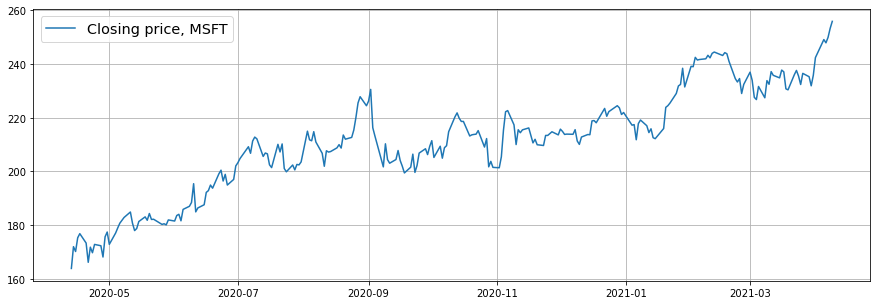

In [4]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"],label="Closing price, MSFT")
plt.grid()
plt.legend(loc='upper left',fontsize="x-large")

I'll add in the local minima and local maxima points into the plot.

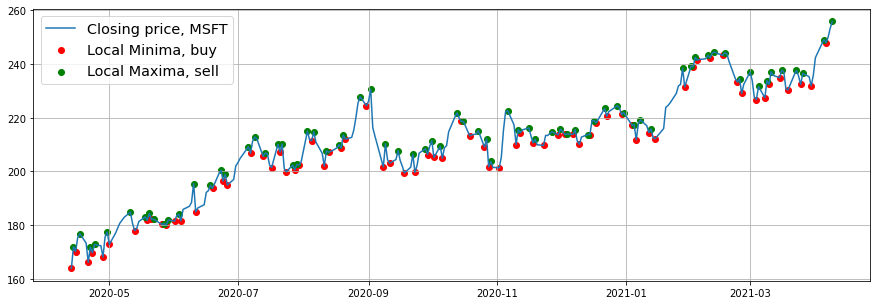

In [114]:
#Identify local minima and maxima

df['min'] = df.iloc[argrelextrema(df['Close'].values, np.less_equal)[0]]['Close']

df['max'] = df.iloc[argrelextrema(df['Close'].values, np.greater_equal)[0]]['Close']


#Plot
plt.figure(figsize=(15,5))
plt.scatter(df.index, df['min'], c='r', label = 'Local Minima, buy')
plt.scatter(df.index, df['max'], c='g', label = 'Local Maxima, sell')
plt.plot(df["Close"],label="Closing price, MSFT")
plt.grid()
plt.legend(loc='upper left',fontsize="x-large")

Got kind of lucky that it started with a buy and ended with a sell, it wouldn't have been the end of the world if it didn't happen that way, but the code will be much cleaner now.

In [100]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,min,max
Date,,,,,,,,,
2020-04-13,162.696652,163.904380,160.667272,163.844971,41905300,0.0,0,163.844971,NaN
2020-04-14,167.299890,172.002106,166.309950,171.952606,52874300,0.0,0,NaN,171.952606
2020-04-15,169.477773,171.823941,167.537498,170.150940,40940800,0.0,0,170.150940,NaN
2020-04-16,172.546576,175.496594,171.160651,175.259003,50479600,0.0,0,NaN,NaN
2020-04-17,177.694254,178.189224,174.100767,176.803314,52765600,0.0,0,NaN,176.803314
...,...,...,...,...,...,...,...,...,...
2021-04-05,242.759995,249.960007,242.699997,249.070007,36910600,0.0,0,NaN,249.070007
2021-04-06,247.610001,249.399994,246.880005,247.860001,22931900,0.0,0,247.860001,NaN
2021-04-07,247.809998,250.929993,247.190002,249.899994,22719800,0.0,0,NaN,NaN


# Hold

Assume you held for 1 year, and then sold.

In [101]:
profit_hold = df['Close'][-1] - df['Close'][0]

In [102]:
profit_hold

92.00503540039062

# Trade

Testing 'buy low, sell high'. 

You can change trade frequency by changing the sensitivity variable, as in the real world no trader can perfectly know when to sell/buy. 

In [115]:
sell_total = df.loc[df['max'].notnull(), 'Close'].sum()

buy_total = df.loc[df['min'].notnull(), 'Close'].sum()

profit_trade = sell_total - buy_total

In [116]:
profit_trade

415.58514404296875

# Thoughts

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-04-13 to 2021-04-09
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    int64  
 7   min           73 non-null     float64
 8   max           73 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 19.6 KB


Proved a truism that trading is more profitable than holding (especially with leverage). 